#07 - Conclusions

Having run the training loop for both Sigmoid and ReLU, I used Matplotlib on my Pandas dataframe to generate graphs of my different tracker metrics. The investigation results overwhelmingly confirmed my initial hypotheses: across differential orders, Sigmoid seemed to have smaller training fluctuations, but optimized at a slower speed. ReLU, conversely, steepened loss surfaces via aggressive exploration, finding optima at the expense of high training variability. Surprisingly, both showed similar end accuracies, suggesting that the same task can be tackled by networks with different architectures.

In [ ]:
#Importing necessary data logs
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent / "src"))
from utils import make_mlp, set_seed, plot_loss


In [ ]:
#Formatting logged data frame to find discrete, plottable intervals
df['lipschitz_upper'] = df['lipschitz_upper'].apply(lambda x: float(str(x).replace('tensor(', '').replace(')', '')))
df['lipschitz_lower'] = df['lipschitz_lower'].apply(lambda x: float(str(x).replace('tensor(', '').replace(')', '')))
max_step = df['step'].max()
df['global_step'] = df['epoch'] * (max_step + 1) + df['step']


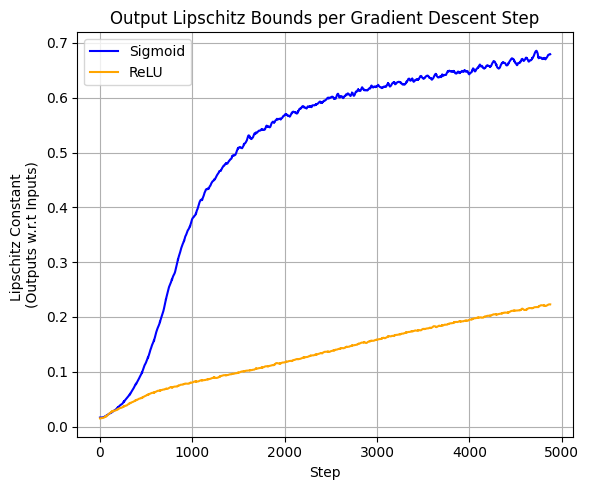

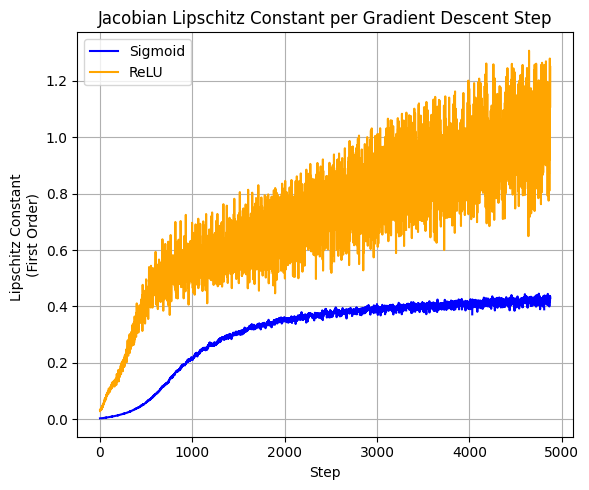

In [ ]:
import matplotlib.pyplot as plt

# Filter for sigmoid and relu again
sigmoid_df = df[df['activation'] == 'sigmoid']
relu_df = df[df['activation'] == 'relu']

#Plotting output Lipschitz w.r.t inputs
plt.figure(figsize=(6, 5))
plt.plot(sigmoid_df['global_step'], sigmoid_df['lipschitz_upper'], label = 'Sigmoid', color='blue')
plt.plot(relu_df['global_step'], relu_df['lipschitz_upper'], label = 'ReLU', color='orange')
plt.title('Output Lipschitz Bounds per Gradient Descent Step')
plt.xlabel('Step')
plt.ylabel('Lipschitz Constant \n(Outputs w.r.t Inputs)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Plotting output Lipschitz w.r.t first-order gradients
plt.figure(figsize=(6, 5))
plt.plot(sigmoid_df['global_step'], sigmoid_df['lipschitz_lower'], label = 'Sigmoid', color='blue')
plt.plot(relu_df['global_step'], relu_df['lipschitz_lower'], label = 'ReLU', color='orange')
plt.title('Jacobian Lipschitz Constant per Gradient Descent Step')
plt.xlabel('Step')
plt.ylabel('Lipschitz Constant \n(First Order)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


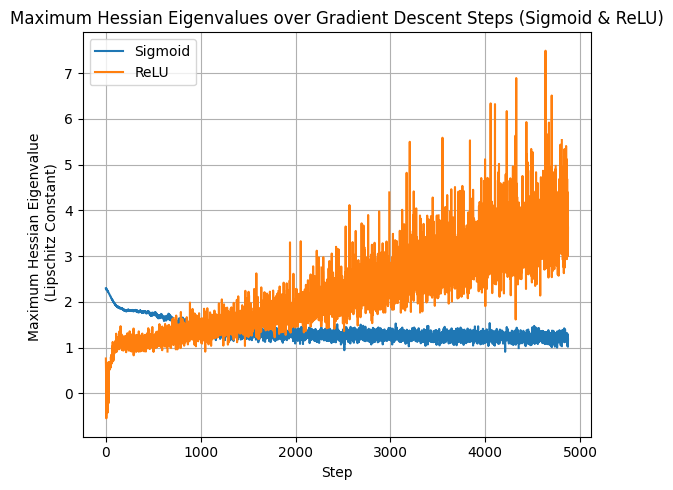

In [ ]:
#Plotting maximum Hessian eigenvalues (second-order Lipschitz constant) on uniform axes
plt.figure(figsize=(6, 5))
plt.plot(sigmoid_df['global_step'], sigmoid_df['max_hessian_eigval'], label = 'Sigmoid')
plt.plot(relu_df['global_step'], relu_df['max_hessian_eigval'], label = "ReLU")
plt.title('Maximum Hessian Eigenvalues over Gradient Descent Steps (Sigmoid & ReLU)')
plt.xlabel('Step')
plt.ylabel('Maximum Hessian Eigenvalue \n (Lipschitz Constant)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

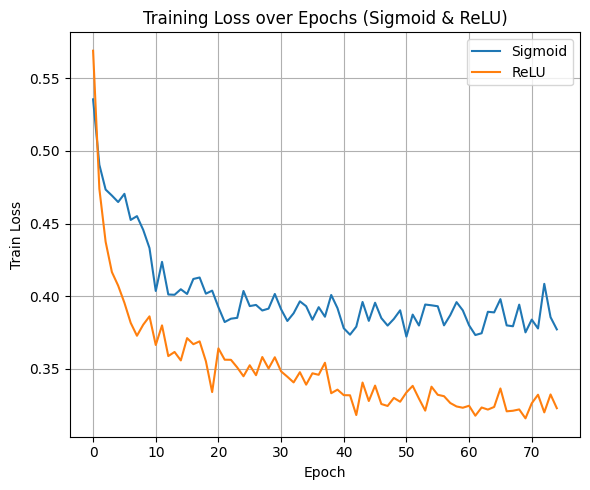

In [ ]:
#Plotting raw training loss over epochs for both functions
sigmoid_epoch_df = sigmoid_df.dropna(subset=['train_loss'])
relu_epoch_df = relu_df.dropna(subset=['train_loss'])


plt.figure(figsize=(6, 5))
plt.plot(sigmoid_epoch_df['epoch'], sigmoid_epoch_df['train_loss'], label='Sigmoid')
plt.plot(relu_epoch_df['epoch'], relu_epoch_df['train_loss'], label='ReLU')
plt.title('Training Loss over Epochs (Sigmoid & ReLU)')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


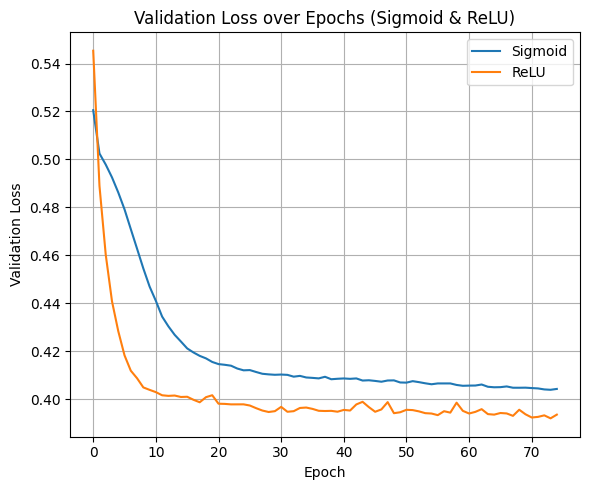

In [ ]:
#Plotting raw validation loss over epochs for both functions

sigmoid_epoch_df = sigmoid_df.dropna(subset=['val_loss'])
relu_epoch_df = relu_df.dropna(subset=['val_loss'])


plt.figure(figsize=(6, 5))
plt.plot(sigmoid_epoch_df['epoch'], sigmoid_epoch_df['val_loss'], label='Sigmoid')
plt.plot(relu_epoch_df['epoch'], relu_epoch_df['val_loss'], label='ReLU')
plt.title('Validation Loss over Epochs (Sigmoid & ReLU)')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

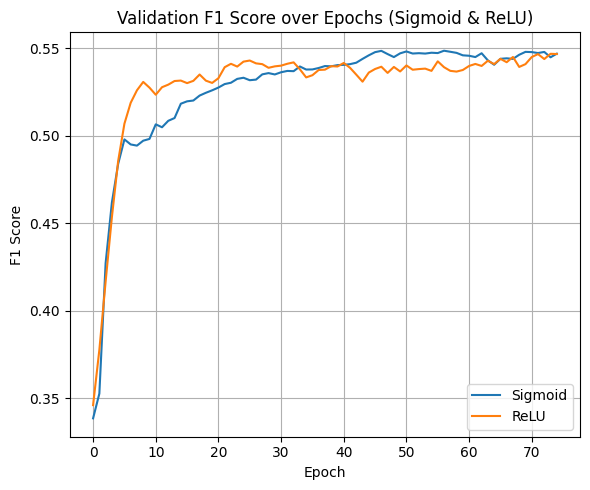

In [ ]:
#Applying an Exponentially Weighted Moving Average (EWMA) for a smoother curve
sigmoid_epoch_df['f1_score_ewm'] = sigmoid_epoch_df['f1_score'].ewm(span=3, adjust=False).mean()
relu_epoch_df['f1_score_ewm'] = relu_epoch_df['f1_score'].ewm(span=3, adjust=False).mean()

#Plotting F1 Scores of both models with epochs
plt.figure(figsize=(6, 5))
plt.plot(sigmoid_epoch_df['epoch'], sigmoid_epoch_df['f1_score_ewm'], label='Sigmoid')
plt.plot(relu_epoch_df['epoch'], relu_epoch_df['f1_score_ewm'], label='ReLU')
plt.title('Validation F1 Score over Epochs (Sigmoid & ReLU)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()